# Group work - Assessment 2

In this assignment, we will focus on salary prediction. The data set for this assignment includes information on job descriptions and salaries. Use this data set to see if you can predict the salary of a job posting (i.e., the `Salary` column in the data set) based on the job description. This is important, because this model can make a salary recommendation as soon as a job description is entered into a system.

## Description of Variables

The description of variables are provided in "Jobs - Data Dictionary.docx"

## Goal

Use the **jobs_alldata.csv** data set and build models to predict **salary**.

**Be careful: this is a REGRESSION task**

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code matters for your grade. **Readability and organization of your code is also important.** You may lose points for submitting unreadable/undecipherable code. Therefore, use markdown cells to create sections, and use comments where necessary.


## Recommended roles for group members:

**Section 1:** to be completed by both group members

**Section 2:** first three models to be completed by the first group member and checked by the second; last two models to be completed by the second group members and checked by the first group member.

**Discussion:** to be completed by both group members

**Important notes:**
- Both group members will get the same grade. Therefore, you should check the work of your group member. If they make a mistake, you will be responsible for that mistake too.
- Both group members must put in their fair share of effort. Otherwise, those who don't contribute to the assignment will not receive any grade.


# Section 1: (8 points in total)

## Data Prep (6 points)

In [1]:
# Importing Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
# To load dataset 

job_data = pd.read_csv('jobs_alldata.csv')
job_data.head(10)

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel
0,67206,Civil Service Title: Regional Director Mental ...,Remote,5,2,3,0
1,88313,The New York City Comptrollerâ€™s Office Burea...,Remote,5,2,4,10-15
2,81315,With minimal supervision from the Deputy Commi...,East campus,5,3,3,5-10
3,76426,OPEN TO CURRENT BUSINESS PROMOTION COORDINATOR...,East campus,1,1,3,0
4,55675,Only candidates who are permanent in the Princ...,Southeast campus,1,1,3,5-10
5,88589,The New York City Department of Sanitation (DS...,Remote,1,2,4,10-15
6,50253,The NYC Law Department is seeking a currently ...,HQ,1,1,3,0
7,60125,Emergency and Intervention Services (EIS) prov...,HQ,1,1,4,10-15
8,67548,The NYC Department of Environmental Protection...,HQ,5,2,4,0
9,48402,The New York City Department of Investigation ...,East campus,5,2,4,0


In [3]:
# Summary of the dataframe 

job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Salary           2413 non-null   int64 
 1   Job Description  2413 non-null   object
 2   Location         2413 non-null   object
 3   Min_years_exp    2413 non-null   int64 
 4   Technical        2413 non-null   int64 
 5   Comm             2413 non-null   int64 
 6   Travel           2413 non-null   object
dtypes: int64(4), object(3)
memory usage: 132.1+ KB


In [4]:
# check the dimensionality of the dataframe 

job_data.shape

(2413, 7)

In [5]:
# Check for missing values

job_data.isna().sum()

Salary             0
Job Description    0
Location           0
Min_years_exp      0
Technical          0
Comm               0
Travel             0
dtype: int64

In [6]:
# split the dataset using 75:25 ratio

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(job_data, test_size=0.3, random_state=42)

In [7]:
# To separate target variable (i.e. Salary) as we don't want to transform it

y_train = train_data[['Salary']]
y_test = test_data[['Salary']]

In [8]:
# Dropping the target variable from the set of features 

x_train = train_data.drop(['Salary'], axis=1)
x_test = test_data.drop(['Salary'], axis=1)

In [9]:
# using NLTK 

import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vatsal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vatsal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vatsal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
new_train_processed_data = []


# For each row in train_data, we will read the text, tokenize it, remove stopwords, lemmatize it, 
# and save it to the new list new_train_processed_data

for text in train_data['Job Description']:
    text = re.sub(r'[!"#$%&()*+,-./:;<=>?[\]^_`{|}~]', ' ', text).lower()

    text = re.sub('[0-9]+\S+|\s\d+\s|\w+[0-9]+|\w+[\*]+.*|\s[\*]+\s|www\.[^\s]+','',text)
        
    words= nltk.tokenize.word_tokenize(text)
    words = [w for w in words if w.isalpha()]
    words = [w for w in words if len(w)>2 and w not in stopwords.words('english')]
        
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    new_train_processed_data.append(' '.join(words))

In [11]:
train_data['processed_job_description'] = new_train_processed_data

train_data

<ipython-input-11-dbcfeb2f53ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['processed_job_description'] = new_train_processed_data


,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel,processed_job_description
429,63407,Only candidates who are permanent in the Compu...,HQ,1,3,4,0,candidate permanent computer system manager ti...
1185,111372,NYCERS is seeking a Business Analyst with a te...,HQ,5,3,2,10-15,nycers seeking business analyst technical back...
2116,79054,The NYC Department of Environmental Protection...,HQ,1,3,5,0,nyc department environmental protection dep pr...
2127,67864,Only Candidates permanent in the Assistant Civ...,Southeast campus,5,4,3,0,candidate permanent assistant civil engineer t...
458,88695,Please read this posting carefully to make cer...,Remote,1,1,3,0,please read posting carefully make certain mee...
...,...,...,...,...,...,...,...,...
1638,44366,NYC Civilian Complaint Review Board The Civil...,HQ,2,3,3,0,nyc civilian complaint review board civilian c...
1095,52753,The NYC Department of Environmental Protection...,HQ,1,3,4,0,nyc department environmental protection dep en...
1130,78345,The NYC Office of Payroll Administration is re...,HQ,1,3,2,5-10,nyc office payroll administration recruiting i...
1294,87196,HPDTech is the IT division within HPD. Its mis...,Remote,4,2,3,0,hpdtech division within hpd mission identify a...


In [12]:
# Doing the above procedure for test dataset as well

new_test_processed_data = []

for text in test_data['Job Description']:
    text = re.sub(r'[!"#$%&()*+,-./:;<=>?[\]^_`{|}~]', ' ', text).lower()

    text = re.sub('[0-9]+\S+|\s\d+\s|\w+[0-9]+|\w+[\*]+.*|\s[\*]+\s|www\.[^\s]+','',text)
        
    words= nltk.tokenize.word_tokenize(text)
    words = [w for w in words if w.isalpha()]
    words = [w for w in words if len(w)>2 and w not in stopwords.words('english')]
        
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    new_test_processed_data.append(' '.join(words))

In [13]:
test_data['processed_job_description'] = new_test_processed_data

test_data

<ipython-input-13-80a49d23e72f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['processed_job_description'] = new_test_processed_data


,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel,processed_job_description
765,149752,The New York City Housing Authority (NYCHA) is...,HQ,1,2,3,0,new york city housing authority nycha largest ...
2387,64653,"Hiring Rate: $62,272.00 (Flat Rate-Annual) ...",HQ,4,3,1,5-10,hiring rate flat rate annual mission bureau hi...
2162,69530,The Executive Director for Regulatory Reform w...,East campus,4,3,2,0,executive director regulatory reform assist im...
1833,51932,The NYC Department of Environmental Protection...,East campus,2,3,2,0,nyc department environmental protection dep pr...
1814,60218,The Department of Transportationâ€™s (DOT) mis...,East campus,2,2,2,0,department dot mission provide safe efficient ...
...,...,...,...,...,...,...,...,...
2333,58452,The Family Independence Administration/ Office...,HQ,5,4,1,0,family independence administration office rese...
998,90220,In order to be considered for this position ca...,West campus,5,2,3,0,order considered position candidate must servi...
891,68328,In accordance to Local Law 196 established in ...,Remote,1,2,4,0,accordance local lawestablished late sb develo...
1866,92478,About New York City Cyber Command NYC Cyber Co...,Southeast campus,4,5,2,1-5,new york city cyber command nyc cyber command ...


In [14]:
# Creating term-by-document matrix
# TfidfVectorizer includes pre-processing, tokenization, filtering stop words

# selecting 500 most commonly occuring terms 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', max_features=500)  

train_x_tfidf = tfidf_vect.fit_transform(train_data['processed_job_description'])

In [15]:
test_x_tfidf = tfidf_vect.transform(test_data['processed_job_description'])

In [16]:
train_x_tfidf.shape, test_x_tfidf.shape

((1689, 500), (724, 500))

## Feature Engineering (1 points)

Create one NEW feature from existing data. You either transform a single variable, or create a new variable from existing ones. 

Grading: 
- 0.5 points for creating the new feature correctly
- 0.5 points for the justification of the new feature (i.e., why did you create this new feature)

In [17]:
# let's inspect the min_years_exp column 

train_data['Min_years_exp'].describe()

count    1689.000000
mean        3.028419
std         1.796296
min         1.000000
25%         1.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Min_years_exp, dtype: float64

In [18]:
train_data['Min_years_exp'].value_counts()

1    653
5    615
4    250
2    126
3     45
Name: Min_years_exp, dtype: int64

<AxesSubplot:>

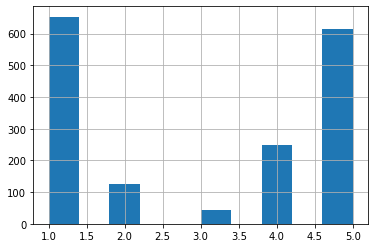

In [19]:
train_data['Min_years_exp'].hist()

**Since, there are many records with each having an individual observation for min_years_exp, it would be better to group these in categorical bins and create an ordinal column for "minimum years of exp required" variable.**

In [20]:
# Transforming  continuous data into categorical data (bins)
# Created 2 bins :- 
# 0 to 2 = ‘1-2 years of exp required’
# 3 to 5 = ‘3-5 years of exp required’

def new_column(df):
    
    df['num_min_exp_binned'] = pd.cut(df['Min_years_exp'],
                                       bins=[0,2,5], 
                                       labels=False, 
                                       include_lowest=True,
                                       ordered=True)
    return df[['num_min_exp_binned']]

In [21]:
new_column(train_data)

<ipython-input-20-20d3d1c35b54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_min_exp_binned'] = pd.cut(df['Min_years_exp'],


,num_min_exp_binned
429,0
1185,1
2116,0
2127,1
458,0
...,...
1638,0
1095,0
1130,0
1294,1


In [22]:
new_column(test_data)

<ipython-input-20-20d3d1c35b54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_min_exp_binned'] = pd.cut(df['Min_years_exp'],


,num_min_exp_binned
765,0
2387,1
2162,1
1833,0
1814,0
...,...
2333,1
998,1
891,0
1866,1


<AxesSubplot:>

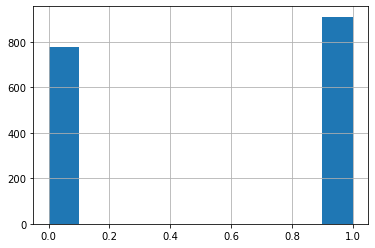

In [23]:
train_data['num_min_exp_binned'].hist()

In [24]:
train_data['num_min_exp_binned'].value_counts()

1    910
0    779
Name: num_min_exp_binned, dtype: int64

In [25]:
# checking the train_data with new columns 

train_data.head(5)

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel,processed_job_description,num_min_exp_binned
429,63407,Only candidates who are permanent in the Compu...,HQ,1,3,4,0,candidate permanent computer system manager ti...,0
1185,111372,NYCERS is seeking a Business Analyst with a te...,HQ,5,3,2,10-15,nycers seeking business analyst technical back...,1
2116,79054,The NYC Department of Environmental Protection...,HQ,1,3,5,0,nyc department environmental protection dep pr...,0
2127,67864,Only Candidates permanent in the Assistant Civ...,Southeast campus,5,4,3,0,candidate permanent assistant civil engineer t...,1
458,88695,Please read this posting carefully to make cer...,Remote,1,1,3,0,please read posting carefully make certain mee...,0


In [26]:
# dropping Min_years_exp column 

new_train_data = train_data.drop(['Min_years_exp'], axis=1)

In [27]:
# doing the same procedure for test data as well

new_test_data = test_data.drop(['Min_years_exp'], axis=1)

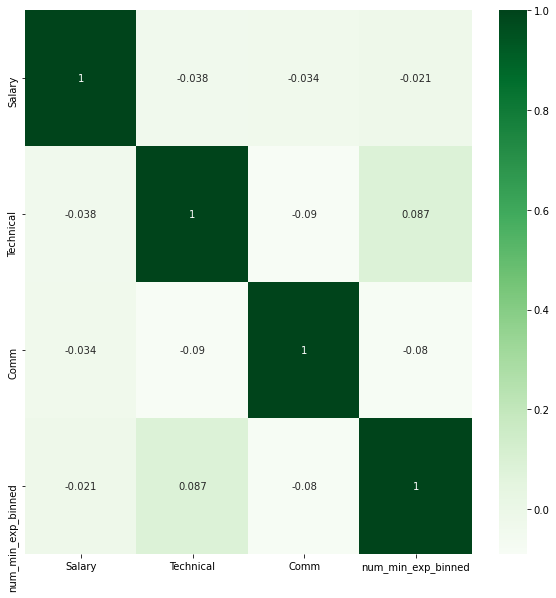

In [28]:
# To find correlation between each variable in train data 

import seaborn as sns 

corr_matrix = new_train_data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(10,10))

# plotting heatmap 
heat_map = sns.heatmap(new_train_data[top_corr_features].corr(), annot=True, cmap="Greens")

**"Technical" and "num_min_exp_binned" are the most highly correlated of the variables, with a positive correlation of 0.087. 
While moderately positively related, this correlation isn’t particularly worrisome for the current goal, so we will consider all features.**

In [29]:
# Redoing separation of target and test variables from new_train_data and new_test_data respectively. 

y_train = new_train_data[['Salary']]
y_test = new_test_data[['Salary']]

In [30]:
# Redoing the dropping of the target variable from the set of features for train and test data respectively

x_train = new_train_data.drop(['Salary'], axis=1)
x_test = new_test_data.drop(['Salary'], axis=1)

In [31]:
x_train.head(5)

,Job Description,Location,Technical,Comm,Travel,processed_job_description,num_min_exp_binned
429,Only candidates who are permanent in the Compu...,HQ,3,4,0,candidate permanent computer system manager ti...,0
1185,NYCERS is seeking a Business Analyst with a te...,HQ,3,2,10-15,nycers seeking business analyst technical back...,1
2116,The NYC Department of Environmental Protection...,HQ,3,5,0,nyc department environmental protection dep pr...,0
2127,Only Candidates permanent in the Assistant Civ...,Southeast campus,4,3,0,candidate permanent assistant civil engineer t...,1
458,Please read this posting carefully to make cer...,Remote,1,3,0,please read posting carefully make certain mee...,0


In the above dataframe output, we can see that both the columns "Min_years_exp" column is dropped from the x_train data. 

In [32]:
x_train.dtypes

Job Description              object
Location                     object
Technical                     int64
Comm                          int64
Travel                       object
processed_job_description    object
num_min_exp_binned            int64
dtype: object

In [33]:
# Feature transformation and scaling

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [34]:
# To identify the categorical columns

categorical_cols = x_train.select_dtypes('object').columns.to_list()

categorical_cols

['Job Description', 'Location', 'Travel', 'processed_job_description']

In [35]:
# text column 

text_column = ['Job Description', 'processed_job_description']

In [36]:
# removing text column from categorical columns 

for col in text_column:
    categorical_cols.remove(col)

In [37]:
# To identify the numerical columns

numeric_cols = x_train.select_dtypes(include=[np.number]).columns.to_list()

numeric_cols

['Technical', 'Comm', 'num_min_exp_binned']

In [38]:
# Pipeline 

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [39]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [40]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

In [41]:
x_train.head(5)

,Job Description,Location,Technical,Comm,Travel,processed_job_description,num_min_exp_binned
429,Only candidates who are permanent in the Compu...,HQ,3,4,0,candidate permanent computer system manager ti...,0
1185,NYCERS is seeking a Business Analyst with a te...,HQ,3,2,10-15,nycers seeking business analyst technical back...,1
2116,The NYC Department of Environmental Protection...,HQ,3,5,0,nyc department environmental protection dep pr...,0
2127,Only Candidates permanent in the Assistant Civ...,Southeast campus,4,3,0,candidate permanent assistant civil engineer t...,1
458,Please read this posting carefully to make cer...,Remote,1,3,0,please read posting carefully make certain mee...,0


In [42]:
# dropping "Job Description" and "processed_job_description" from x_train and x_test dataframes

x_train = x_train.drop(['Job Description', 'processed_job_description'], axis=1)

In [43]:
x_test = x_test.drop(['Job Description', 'processed_job_description'], axis=1)

In [44]:
x_train.head(5)

,Location,Technical,Comm,Travel,num_min_exp_binned
429,HQ,3,4,0,0
1185,HQ,3,2,10-15,1
2116,HQ,3,5,0,0
2127,Southeast campus,4,3,0,1
458,Remote,1,3,0,0


In [45]:
#To fit and transform the train data

transformed_train_data = preprocessor.fit_transform(x_train)

transformed_train_data

array([[ 0.59306224,  0.9780514 , -1.0808165 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59306224, -1.25579419,  0.92522644, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59306224,  2.09497419, -1.0808165 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.59306224, -1.25579419, -1.0808165 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.23136749, -0.1388714 ,  0.92522644, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23136749, -0.1388714 , -1.0808165 , ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
# To Transform the test data

transformed_test_data = preprocessor.transform(x_test)

transformed_test_data

array([[-0.23136749, -0.1388714 , -1.0808165 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59306224, -2.37271699,  0.92522644, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.59306224, -1.25579419,  0.92522644, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.23136749,  0.9780514 , -1.0808165 , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.24192171, -1.25579419,  0.92522644, ...,  1.        ,
         0.        ,  0.        ],
       [-1.05579722,  0.9780514 ,  0.92522644, ...,  0.        ,
         0.        ,  0.        ]])

In [47]:
# To check the dimensionality of the transformed train dataframe

transformed_train_data.shape

(1689, 12)

In [48]:
# To check the dimensionality of the transformed test dataframe

transformed_test_data.shape

(724, 12)

In [49]:
# first, transforming csr_matrix (i.e. train_x_tfidf) into dataframe for train data 

transformed_train_x_tfidf = pd.DataFrame(train_x_tfidf.todense())
transformed_train_x_tfidf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.0,0.0,0.054215,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
1,0.083125,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.057372,0.0,0.0,0.00000,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.056762,0.0,0.0,0.0,0.0,0.000000,...,0.057354,0.056418,0.000000,0.000000,0.000000,0.0,0.0,0.07477,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.105428,0.0,0.0,0.00000,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.041552,...,0.000000,0.000000,0.043824,0.022334,0.000000,0.0,0.0,0.00000,0.0,0.0


In [50]:
# transforming csr_matrix (i.e. test_x_tfidf) into dataframe for test data as well

transformed_test_x_tfidf = pd.DataFrame(test_x_tfidf.todense())
transformed_train_x_tfidf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.0,0.0,0.054215,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
1,0.083125,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.057372,0.0,0.0,0.00000,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.056762,0.0,0.0,0.0,0.0,0.000000,...,0.057354,0.056418,0.000000,0.000000,0.000000,0.0,0.0,0.07477,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.105428,0.0,0.0,0.00000,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.041552,...,0.000000,0.000000,0.043824,0.022334,0.000000,0.0,0.0,0.00000,0.0,0.0


In [51]:
# transforming numpy array (i.e. transformed_train_data) into dataframe for training dataset

sliced_train_df = pd.DataFrame(transformed_train_data)
sliced_train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.593062,0.978051,-1.080817,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.593062,-1.255794,0.925226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.593062,2.094974,-1.080817,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.417492,-0.138871,0.925226,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.055797,-0.138871,-1.080817,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
# transforming numpy array (i.e. transformed_test_data) into dataframe for test dataset

sliced_test_df = pd.DataFrame(transformed_test_data)
sliced_test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.231367,-0.138871,-1.080817,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.593062,-2.372717,0.925226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.593062,-1.255794,0.925226,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.593062,-1.255794,-1.080817,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.231367,-1.255794,-1.080817,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Combining "transformed_train_x_tfidf" and "sliced_train_df" dataframes into a combined dataframe so that we can consider all features to predict Salary:-**

**Doing the same procedure for test data i.e. merging "transformed_test_x_tfidf" with "sliced_test_df" into a combined dataframe**

In [53]:
combined_train_df = pd.concat([transformed_train_x_tfidf, sliced_train_df], axis = 1)
combined_train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.0,0.0,0.054215,0.000000,0.0,0.0,0.0,0.0,0.000000,...,-1.080817,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.083125,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.925226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.0,0.0,0.000000,0.056762,0.0,0.0,0.0,0.0,0.000000,...,-1.080817,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.925226,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.041552,...,-1.080817,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
combined_test_df = pd.concat([transformed_test_x_tfidf, sliced_test_df], axis = 1)
combined_test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2,3,4,5,6,7,8,9,10,11
0,0.058561,0.00000,0.0,0.091689,0.000000,0.000000,0.0,0.05725,0.0,0.045312,...,-1.080817,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.04723,0.0,0.000000,0.000000,0.060068,0.0,0.00000,0.0,0.000000,...,0.925226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.073922,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,...,0.925226,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.00000,0.0,0.000000,0.052995,0.000000,0.0,0.00000,0.0,0.000000,...,-1.080817,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,...,-1.080817,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
# Replace NaN with zero and infinity with large finite numbers for both train and test data 

combined_train_df = np.nan_to_num(combined_train_df)
combined_test_df = np.nan_to_num(combined_test_df)

## Find the Baseline (1 point)

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
#First find the average value of the target

mean_value = np.mean(y_train['Salary'])

mean_value

78566.0307874482

In [58]:
# Predict all values as the mean

pred_baseline = np.repeat(mean_value, len(y_test))

pred_baseline

array([78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
      

In [59]:
baseline_mse = mean_squared_error(y_test, pred_baseline)

baseline_rmse = np.sqrt(baseline_mse)

print('Baseline RMSE: {}' .format(baseline_rmse))

Baseline RMSE: 28294.892856870818


In [60]:
y_train['Salary']

429      63407
1185    111372
2116     79054
2127     67864
458      88695
         ...  
1638     44366
1095     52753
1130     78345
1294     87196
860      74647
Name: Salary, Length: 1689, dtype: int64

# Section 2: (7 points in total)

Build the following models:


## Decision Tree: (1 point)

In [62]:
# using different parameters 
from sklearn.tree import DecisionTreeRegressor

dt_reg2 = DecisionTreeRegressor(max_depth=10, min_samples_leaf = 5) 

dt_reg2.fit(combined_train_df, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

In [63]:
# Find RMSE value for train data 

pred_train = dt_reg2.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 15653.742155641086


In [64]:
#Find RMSE value for test data

pred_test = dt_reg2.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test Model RMSE: {}' .format(test_rmse))

Test Model RMSE: 23182.660898585982


In [65]:
# Train model 

from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(min_samples_leaf = 10) 

dt_reg.fit(combined_train_df, y_train)

DecisionTreeRegressor(min_samples_leaf=10)

In [66]:
# Find RMSE value for train data 

pred_train = dt_reg.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 16229.408750946544


In [67]:
#Find RMSE value for test data

pred_test = dt_reg.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test Model RMSE: {}' .format(test_rmse))

Test Model RMSE: 22710.81472817472


## Voting regressor (2 points):

The voting regressor should have at least 3 individual models

In [68]:
# Using DecisionTreeRegressor, Support Vector Regressor, Stochastic Gradient Descent

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import VotingRegressor


dt_reg = DecisionTreeRegressor(max_depth=20)
svm_reg = SVR(kernel="rbf", C=10, epsilon=0.01, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dt_reg), 
                        ('svr', svm_reg), 
                        ('sgd', sgd_reg)])

voting_reg.fit(combined_train_df, y_train)

C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=20)),
                            ('svr', SVR(C=10, epsilon=0.01)),
                            ('sgd', SGDRegressor(max_iter=10000))])

In [69]:
# Find RMSE value for train data 

pred_train = voting_reg.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 15341.882638426034


In [70]:
pred_test = voting_reg.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 18735.00583535874


In [71]:
# Using DecisionTreeRegressor, Stochastic Gradient Descent, Random Forest Regressor 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


dt_reg = DecisionTreeRegressor(max_depth=20)
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)
rf_reg = RandomForestRegressor(n_estimators=10, random_state=1)

voting_reg = VotingRegressor(
            estimators=[('dt', dt_reg), 
                        ('sgd', sgd_reg), 
                        ('rf', rf_reg)])

voting_reg.fit(combined_train_df, y_train)

C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=20)),
                            ('sgd', SGDRegressor(max_iter=10000)),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1))])

In [72]:
# Find RMSE value for train data 

pred_train = voting_reg.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 8550.779947432175


In [73]:
pred_test = voting_reg.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 16073.240717634795


**Lower the RMSE better is Model performance**

In [74]:
# Voting Regressor with weights parameter 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


dt_reg = DecisionTreeRegressor(max_depth=20)
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)
rf_reg = RandomForestRegressor(n_estimators=10, random_state=1)

voting_reg = VotingRegressor(
            estimators=[('dt', dt_reg), ('rf', rf_reg), ('sgd', sgd_reg)],
                        weights=[0.6, 0.2, 0.2])

voting_reg.fit(combined_train_df, y_train)

C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=20)),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('sgd', SGDRegressor(max_iter=10000))],
                weights=[0.6, 0.2, 0.2])

In [75]:
# Find RMSE value for train data 

pred_train = voting_reg.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 6371.4863182621875


In [76]:
# Find RMSE value for test data 

pred_test = voting_reg.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 17015.053388172364


In [77]:
# with different weights for different algorithms 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


dt_reg = DecisionTreeRegressor(max_depth=20)
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)
rf_reg = RandomForestRegressor(n_estimators=10, random_state=1)

voting_reg = VotingRegressor(
            estimators=[('dt', dt_reg), ('rf', rf_reg), ('sgd', sgd_reg)],
                        weights=[0.4, 0.4, 0.2])

voting_reg.fit(combined_train_df, y_train)

C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=20)),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('sgd', SGDRegressor(max_iter=10000))],
                weights=[0.4, 0.4, 0.2])

In [78]:
# Find RMSE value for train data 

pred_train = voting_reg.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 7040.790963604296


In [79]:
# Find RMSE value for test data 

pred_test = voting_reg.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 15636.342315300137


## A Boosting model: (1 point)

Build either an Adaboost or a GradientBoost model

In [80]:
# GradientBoosting model

from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1) 

gb_reg.fit(combined_train_df, y_train)

C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(max_depth=2)

In [81]:
# Find RMSE value for train data 

pred_train = gb_reg.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 17306.909612996675


In [82]:
# Find RMSE value for test data 

pred_test = gb_reg.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 20470.859248486668


In [83]:
gb_reg2 = GradientBoostingRegressor(max_depth=3, n_estimators=10, learning_rate=0.5) 

gb_reg2.fit(combined_train_df, y_train)

C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(learning_rate=0.5, n_estimators=10)

In [84]:
# Find RMSE value for train data 

pred_train = gb_reg2.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 16552.34210515613


In [85]:
# Find RMSE value for test data 

pred_test = gb_reg2.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 20510.29486856332


## Neural network: (1 point)

In [86]:
from sklearn.neural_network import MLPRegressor

nn_reg = MLPRegressor(hidden_layer_sizes=(100,))

nn_reg.fit(combined_train_df, y_train)

C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [87]:
# Find RMSE value for train data 

pred_train = nn_reg.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 80377.36914340989


In [88]:
# Find RMSE value for test data 

pred_test = nn_reg.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 78048.33764506846


In [89]:
# Increasing maximum iterations for convergence

nn_reg2 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)

nn_reg2.fit(combined_train_df, y_train)

C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=1000)

In [90]:
# Find RMSE value for train data 

pred_train = nn_reg2.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 39637.47578086444


In [91]:
# Find RMSE value for test data 

pred_test = nn_reg2.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test Model RMSE: {}' .format(test_rmse))

Test Model RMSE: 37005.83841039419


In [99]:
nn_reg3 = MLPRegressor(hidden_layer_sizes=(100,75,50,25))



nn_reg3.fit(combined_train_df, y_train)

C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Vatsal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 75, 50, 25))

In [100]:
# Find RMSE value for train data 



pred_train = nn_reg3.predict(combined_train_df)



train_mse = mean_squared_error(y_train, pred_train)



train_rmse = np.sqrt(train_mse)



print('Train Model RMSE: {}' .format(train_rmse))

Train Model RMSE: 16987.900751636684


In [101]:
# Find RMSE value for test data 



pred_test = nn_reg3.predict(combined_test_df)



test_mse = mean_squared_error(y_test, pred_test)



test_rmse = np.sqrt(test_mse)



print('Test Model RMSE: {}' .format(test_rmse))

Test Model RMSE: 20710.618545442336


## Grid search (2 points)

Perform either a full or randomized grid search on any model you want. There has to be at least two parameters for the search. 

In [92]:
# Full Grid Search 

from sklearn.model_selection import GridSearchCV

dt_reg_model = DecisionTreeRegressor()

param_grid = {'max_depth': range(1, 11),
              'min_samples_split': range(10, 60, 10)}           

grid_search = GridSearchCV(dt_reg_model,param_grid, cv=5, n_jobs=1, scoring='neg_mean_squared_error')           

grid_search.fit(combined_train_df, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_squared_error')

In [93]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

28945.884933338206 {'max_depth': 1, 'min_samples_split': 10}
28945.884933338206 {'max_depth': 1, 'min_samples_split': 20}
28945.884933338206 {'max_depth': 1, 'min_samples_split': 30}
28945.884933338206 {'max_depth': 1, 'min_samples_split': 40}
28945.884933338206 {'max_depth': 1, 'min_samples_split': 50}
28341.562355639035 {'max_depth': 2, 'min_samples_split': 10}
28341.562355639035 {'max_depth': 2, 'min_samples_split': 20}
28341.562355639035 {'max_depth': 2, 'min_samples_split': 30}
28341.562355639035 {'max_depth': 2, 'min_samples_split': 40}
28341.562355639035 {'max_depth': 2, 'min_samples_split': 50}
28051.512828906783 {'max_depth': 3, 'min_samples_split': 10}
28051.512828906783 {'max_depth': 3, 'min_samples_split': 20}
28062.86939015294 {'max_depth': 3, 'min_samples_split': 30}
28062.86939015294 {'max_depth': 3, 'min_samples_split': 40}
28062.86939015294 {'max_depth': 3, 'min_samples_split': 50}
27522.87957371677 {'max_depth': 4, 'min_samples_split': 10}
27444.347373495933 {'max_dep

In [94]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_split': 20}

In [95]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_split=20)

In [102]:
# using the best params 

param_grid = {'max_depth': [8],
              'min_samples_split': [20]}           

grid_search = GridSearchCV(dt_reg_model,param_grid, cv=5, n_jobs=1, scoring='neg_mean_squared_error')           

grid_search.fit(combined_train_df, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'max_depth': [8], 'min_samples_split': [20]},
             scoring='neg_mean_squared_error')

In [103]:
# Find RMSE value for train data 

pred_train = grid_search.best_estimator_.predict(combined_train_df)

train_mse = mean_squared_error(y_train, pred_train)

train_rmse = np.sqrt(train_mse)

print('Train Model RMSE value: {}' .format(train_rmse))

Train Model RMSE value: 18613.655133042237


In [104]:
#Test RMSE
pred_test = grid_search.best_estimator_.predict(combined_test_df)

test_mse = mean_squared_error(y_test, pred_test)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 23075.280739922597


# Discussion (5 points in total)


## List the train and test values of each model you built (2 points)

***Decision Tree***

*1st Model:-*

Train RMSE : 15653.74

Test RMSE : 23182.66

*2nd Model:-*

Train RMSE : 16229.40

Test RMSE : 22710.14

---

***Voting Regressor***

*1st Model(Using DT, SVR, SGD):-*

Train RMSE : 15341.88

Test RMSE : 18735.00

*2nd Model(Using DT, SGD, RF):-*

Train RMSE : 8550.78

Test RMSE : 16073.24

*3rd Model(weights parameter DT, SGD, RF):-*

Train RMSE : 6371.48

Test RMSE : 17015.05

*4th Model(with different weights for different algorithms ):-*

Train RMSE : 7040.79

Test RMSE : 15636.34


---



***Gradient Boosting***

*1st Model:-*

Train RMSE : 17306.90

Test RMSE : 20470.85

*2nd Model (with different parameters):-*

Train RMSE : 16552.34

Test RMSE : 20510.29



---



***Neural Networks***

*1st Model:-*

Train RMSE : 80377.36

Test RMSE : 78048.33

*2nd Model (increasing maximum iterations) :-*

Train RMSE : 39637.47

Test RMSE : 37005.83

*3rd Model (using pipeline):-*

Train RMSE : 16987

Test RMSE : 20710



---



***Full Grid Search***

Train RMSE : 18613.65

Test RMSE : 23075.28



## Which model performs the best and why? (0.5 points) 
## How does it compare to baseline? (0.5 points)

Hint: The best model is the one that has the highest TEST score (regardless of any of the training values). If you select your model based on TRAIN values, you will lose points.

## Is there any evidence of overfitting in the best model, why or why not? If there is, what did you do about it? (1 point)

## Is there any overfitting in the other models (besides the best model), why or why not? If there is, what did you do about it? (1 point)